In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error
from data.street_view import get_filenames

Using TensorFlow backend.


## Load file names

In [2]:
street_view_dir = os.path.join('..', 'data', 'street_view')

if os.path.exists(street_view_dir):
    test_filenames = get_filenames(street_view_dir)[1]
else:
    test_examples_path = os.path.join('..', 'data', 'test_examples')
    test_filenames = [
        os.path.join(test_examples_path, f) for f in os.listdir(test_examples_path)
    ]

## Load model

In [3]:
model_location = os.path.join('..', 'models', 'rotnet_street_view_resnet50.hdf5')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

## Evaluate model

In [4]:
batch_size = 64
out = model.evaluate_generator(
    RotNetDataGenerator(
        test_filenames,
        input_shape=(224, 224, 3),
        batch_size=batch_size,
        preprocess_func=preprocess_input,
        crop_center=True,
        crop_largest_rect=True,
        shuffle=True
    ),
    steps=len(test_filenames) / batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

Test loss: 1.9894855072
Test angle error: 1.81053649204


## Display examples

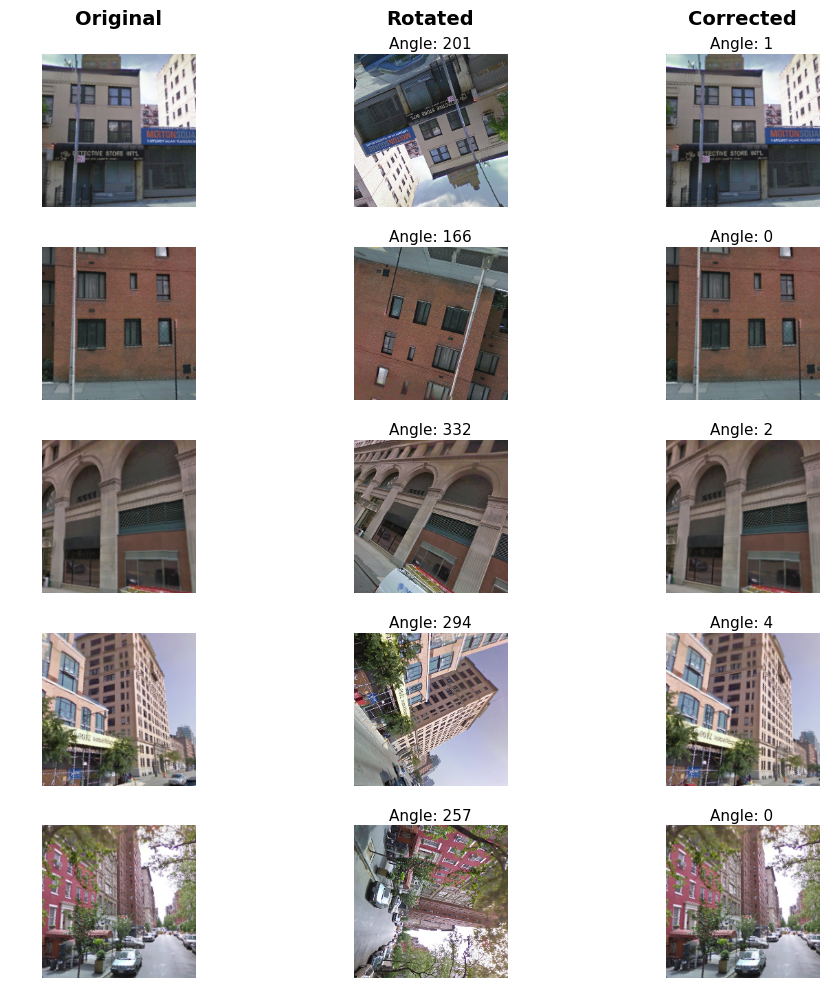

In [15]:
num_images = 5

display_examples(
    model, 
    test_filenames,
    num_images=num_images,
    size=(224, 224),
    crop_center=True,
    crop_largest_rect=True,
    preprocess_func=preprocess_input,
)